# What is Image Stitching ?

*Image stitching or photo stitching is the process of combining multiple photographic images with overlapping fields of view to produce a segmented panorama or high-resolution image.*

<center><img src="data/image_stitching.png"></center>

## Image Transformations

Image Manipulation refers to a process of bringing changes to a digitized image for transforming it to a desired image. The changes are made possible by resorting to image processing.

There are two types of image manipulation :
- Image filtering (changing range of bringtness)
- Image Warping (change domain/location)

$$ g(x,y) = f(T_{d}(x,y)) $$
 
Transformation $T_{d}$ is a coordinate changing operation.

$T_{d}$ can be represented by a a matrix $T$ 

Let's look at some image warping transformations.


In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Load the image
image = cv2.imread('data\girl_art.jpg')

In [36]:
def show(image):
  '''
  Displays an image loaded with cv2 and convert the image to RGB
  '''
  plt.figure(figsize=(6,6))
  plt.axis('off')
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb)
  plt.show()
  

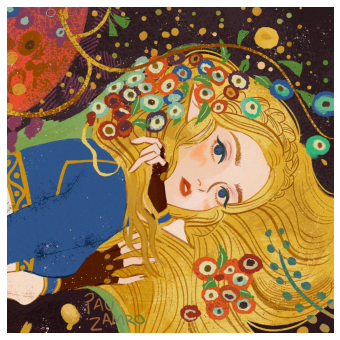

In [26]:
show(image)

### Affine transformations

As the name suggests in this transformation, preserving parallel relationships is one of the main concepts of this kind of transformation where lines will remain the same. Still, the square can change into a rectangle or parallelogram. It works by preserving the lengths and angles. 

<h4>Skew Image</h4>

In [20]:
num_rows, num_cols = image.shape[:2]

OpenCV provides two transformation functions, ``cv.warpAffine`` and ``cv.warpPerspective``, with which you can perform all kinds of transformations. ``cv.warpAffine`` takes a 2x3 transformation matrix while ``cv.warpPerspective`` takes a 3x3 transformation matrix as input.

In [80]:
'''
Image Translation
In computer vision or image processing, shifting an image into a frame is considered as the image translation.
'''

translation_matrix = np.float32([[1, 0, 200],
                                 [0, 1, 110],
                                 [0, 0, 1]
                                 ])
img_translation = cv2.warpPerspective(
    image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)


# Image Rotation
img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D(
    (num_cols/2, num_rows/2), 30, 0.8), (num_cols, num_rows))

# Image Scaling
img_shrinked = cv2.resize(image, (150, 200), interpolation=cv2.INTER_AREA)
img_enlarged = cv2.resize(image, None, fx=5, fy=1.5,
                          interpolation=cv2.INTER_CUBIC)

Text(0.5, 1.0, 'Image enlarging')

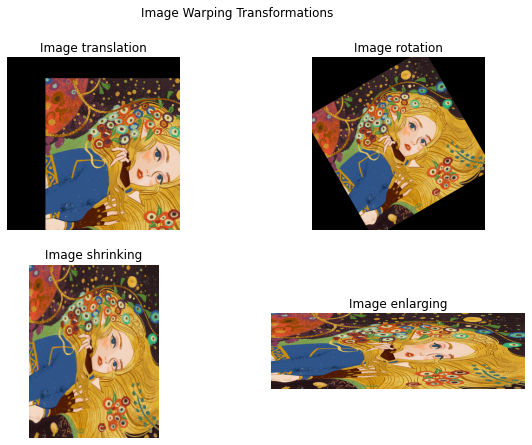

In [81]:
fig, axes = plt.subplots(2,2,figsize=(10,7))
fig.suptitle('Image Warping Transformations')
[axi.set_axis_off() for axi in axes.ravel()]

axes[0,0].imshow(cv2.cvtColor(img_translation, cv2.COLOR_BGR2RGB))
axes[0,0].set_title('Image translation')

axes[0,1].imshow(cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB))
axes[0,1].set_title('Image rotation')


axes[1,0].imshow(cv2.cvtColor(img_shrinked, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Image shrinking')

axes[1,1].imshow(cv2.cvtColor(img_enlarged, cv2.COLOR_BGR2RGB))
axes[1,1].set_title('Image enlarging')

In [82]:
# 3x2 matrix transformation
src_points = np.float32([[0,0], 
                         [num_cols-1,0], 
                         [0,num_rows-1]]
                        )

dst_points = np.float32([[0,0], 
                         [int(0.6*(num_cols-1)),0],
                         [int(0.4*(num_cols-1)),num_rows-1]]
                        )

In [83]:
# Skewed image
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))

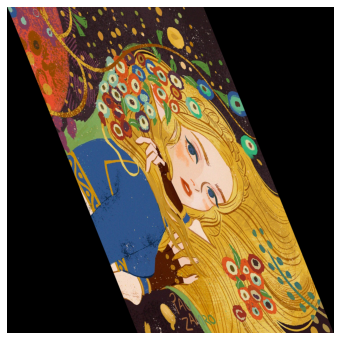

In [84]:
show(img_afftran)

<h4>Image Mirror</h4>
The mirror of an image consists on flipping the axis on the direction you want (y or x axis).

Mirror about Y-axis :

$$ x_2 = - x_1 \\
y_2 = y_1 \\ \\

M_y = \begin{bmatrix}
-1 & 0 \\
0 & 1
\end{bmatrix}

$$

In [85]:
src_points = np.float32([[0, 0],
                         [num_cols-1, 0], 
                         [0, num_rows-1]])

dst_points = np.float32([[num_cols-1, 0],
                         [0, 0], 
                         [num_cols-1, num_rows-1]])


mirror_matrix = cv2.getAffineTransform(src_points, dst_points)

img_mirror = cv2.warpAffine(image, mirror_matrix, (num_cols, num_rows))

Text(0.5, 1.0, 'Mirror')

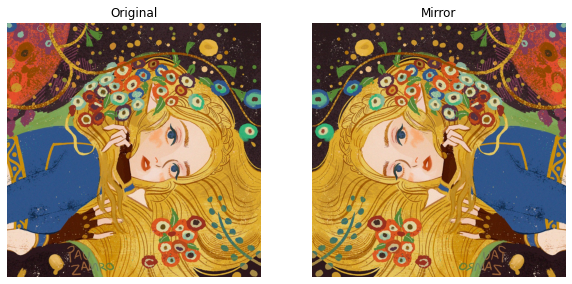

In [101]:
f, axarr = plt.subplots(1,2,figsize=(10,10))
[axi.set_axis_off() for axi in axarr.ravel()]

axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original')

axarr[1].imshow(cv2.cvtColor(img_mirror, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Mirror')

### Projective Transformations

As seen in the Affine transformation, we have less control in shifting the points, but in projective transformation, we have the freedom to move and shift the control points. It works on the projective view option where we see an object from its every plane. For example, a square image on paper from the front side looks like a square, but it will look like a trapezoid from the slight right or left side.

The point of the projection matrix is to map one plane to another through a point.

That matrix is also called **Homography**.

In [97]:
src_points = np.float32([[0,0],
                         [num_cols-1,0],
                         [0,num_rows-1], 
                         [num_cols-1,num_rows-1]])

dst_points = np.float32([[0,0], 
                         [num_cols-1,0],
                         [int(0.33*num_cols),num_rows-1],
                         [int(0.66*num_cols),num_rows-1]])

In [107]:
np.set_printoptions(suppress=True)
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
projective_matrix

array([[ 1.        ,  1.        ,  0.        ],
       [ 0.        ,  3.02693603,  0.        ],
       [-0.        ,  0.00225466,  1.        ]])

In [98]:
img_protran = cv2.warpPerspective(image, projective_matrix, (num_cols,num_rows))

Text(0.5, 1.0, 'Mirror')

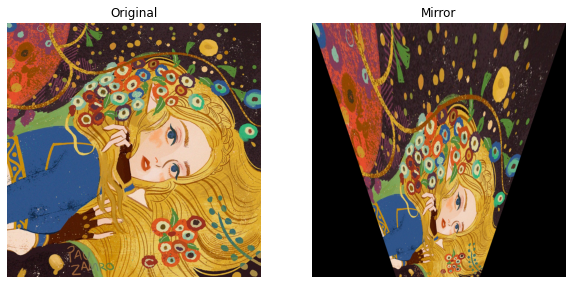

In [100]:
f, axarr = plt.subplots(1,2,figsize=(10,10))
[axi.set_axis_off() for axi in axarr.ravel()]

axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original')

axarr[1].imshow(cv2.cvtColor(img_protran, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Mirror')

## Computing Homography

## Dealing with Outliers : RANSAC

## Warping and Blending Images

# 📚 References 

1. *First Principles of Computer Vision*, https://youtu.be/J1DwQzab6Jg
2. *Image Stitching, Wikipedia*,https://en.wikipedia.org/wiki/Image_stitching
3. *Complete Tutorial On Image Transformations With OpenCV*, https://analyticsindiamag.com/complete-tutorial-on-image-transformations-with-opencv/